In [2]:
import xarray as xr
import copernicusmarine
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

In [3]:
def copernicus(ID,lon,lat,time,var,username='pwalfir',password='PedroW100%'):
        # Set parameters
    data_request = {
       "dataset" : ID,
       "longitude" : lon, 
       "latitude" : lat,
       "time" : time,
       "variables" : var
    }

    # Load xarray dataset
    dat = copernicusmarine.open_dataset(
        dataset_id = data_request["dataset"],
        minimum_longitude = data_request["longitude"][0],
        maximum_longitude = data_request["longitude"][1],
        minimum_latitude = data_request["latitude"][0],
        maximum_latitude = data_request["latitude"][1],
        start_datetime = data_request["time"][0],
        end_datetime = data_request["time"][1],
        variables = data_request["variables"],
        username  = username,
        password = password
    )
    return dat

## AVISO

In [10]:
dat_aviso = copernicus("cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D",
                       [-30, -26],
                       [-30,-26],
                       ["1993-01-01", "2021-06-30"],
                       ["adt"])

INFO - 2024-08-29T20:49:16Z - Dataset version was not specified, the latest one was selected: "202112"
INFO - 2024-08-29T20:49:16Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-08-29T20:49:19Z - Service was not specified, the default one was selected: "arco-time-series"


In [11]:
dat_aviso

<xarray.Dataset> Size: 21MB
Dimensions:    (time: 10408, latitude: 16, longitude: 16)
Coordinates:
  * latitude   (latitude) float32 64B -29.88 -29.62 -29.38 ... -26.38 -26.12
  * longitude  (longitude) float32 64B -29.88 -29.62 -29.38 ... -26.38 -26.12
  * time       (time) datetime64[ns] 83kB 1993-01-01 1993-01-02 ... 2021-06-30
Data variables:
    adt        (time, latitude, longitude) float64 21MB ...
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               1993-01-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             1992-12-31T12:00:00Z
    title:                           DT merged all satellites Global Ocean Gr...

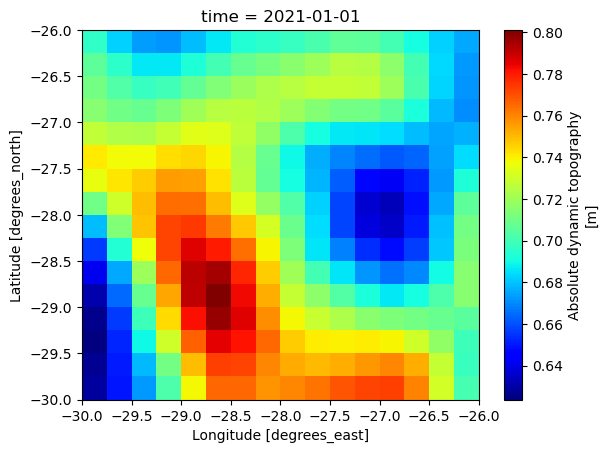

In [13]:
dat_aviso.adt.sel(time="2021-01-01T00:00:00.000000000").plot(cmap='jet')

## GLORYS

In [14]:
dat_glorys = copernicus("cmems_mod_glo_phy_my_0.083deg_P1D-m",
                        [-31, -25],
                        [-31,-25],
                        ["1993-01-01", "2021-06-30"],
                        ["zos"])


INFO - 2024-08-29T20:49:29Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-08-29T20:49:29Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-08-29T20:49:32Z - Service was not specified, the default one was selected: "arco-time-series"


In [15]:
dat_glorys

<xarray.Dataset> Size: 222MB
Dimensions:    (time: 10408, latitude: 73, longitude: 73)
Coordinates:
  * latitude   (latitude) float32 292B -31.0 -30.92 -30.83 ... -25.08 -25.0
  * longitude  (longitude) float32 292B -31.0 -30.92 -30.83 ... -25.08 -25.0
  * time       (time) datetime64[ns] 83kB 1993-01-01 1993-01-02 ... 2021-06-30
Data variables:
    zos        (time, latitude, longitude) float32 222MB ...
Attributes: (12/24)
    Conventions:        CF-1.4
    bulletin_date:      2021-07-07 00:00:00
    bulletin_type:      operational
    comment:            CMEMS product
    domain_name:        GL12
    easting:            longitude
    ...                 ...
    northing:           latitude
    references:         http://www.mercator-ocean.fr
    source:             MERCATOR GLORYS12V1
    title:              daily mean fields from Global Ocean Physics Analysis ...
    z_max:              5727.9169921875
    z_min:              0.49402499198913574

In [16]:
dat_dow = dat_glorys.rolling(latitude=3,longitude=3,center=True).mean()

In [17]:
dat_dow = dat_dow.interp_like(dat_aviso)

In [18]:
lati = np.arange(dat_aviso.latitude.min(),dat_aviso.latitude.max()+(1/12),1/12)
loni = np.arange(dat_aviso.longitude.min(),dat_aviso.longitude.max()+(1/12),1/12)

In [19]:
dat_glorys_i = dat_glorys.interp(latitude=lati,longitude=loni)

In [20]:
dat_glorys_i

<xarray.Dataset> Size: 176MB
Dimensions:    (time: 10408, latitude: 46, longitude: 46)
Coordinates:
  * time       (time) datetime64[ns] 83kB 1993-01-01 1993-01-02 ... 2021-06-30
  * latitude   (latitude) float64 368B -29.88 -29.79 -29.71 ... -26.21 -26.13
  * longitude  (longitude) float64 368B -29.88 -29.79 -29.71 ... -26.21 -26.13
Data variables:
    zos        (time, latitude, longitude) float64 176MB 0.2257 ... 0.3037
Attributes: (12/24)
    Conventions:        CF-1.4
    bulletin_date:      2021-07-07 00:00:00
    bulletin_type:      operational
    comment:            CMEMS product
    domain_name:        GL12
    easting:            longitude
    ...                 ...
    northing:           latitude
    references:         http://www.mercator-ocean.fr
    source:             MERCATOR GLORYS12V1
    title:              daily mean fields from Global Ocean Physics Analysis ...
    z_max:              5727.9169921875
    z_min:              0.49402499198913574

In [21]:
dat_dow

<xarray.Dataset> Size: 21MB
Dimensions:    (time: 10408, latitude: 16, longitude: 16)
Coordinates:
  * latitude   (latitude) float32 64B -29.88 -29.62 -29.38 ... -26.38 -26.12
  * longitude  (longitude) float32 64B -29.88 -29.62 -29.38 ... -26.38 -26.12
  * time       (time) datetime64[ns] 83kB 1993-01-01 1993-01-02 ... 2021-06-30
Data variables:
    zos        (time, latitude, longitude) float64 21MB 0.2257 0.2153 ... 0.3028
Attributes: (12/24)
    Conventions:        CF-1.4
    bulletin_date:      2021-07-07 00:00:00
    bulletin_type:      operational
    comment:            CMEMS product
    domain_name:        GL12
    easting:            longitude
    ...                 ...
    northing:           latitude
    references:         http://www.mercator-ocean.fr
    source:             MERCATOR GLORYS12V1
    title:              daily mean fields from Global Ocean Physics Analysis ...
    z_max:              5727.9169921875
    z_min:              0.49402499198913574

In [22]:
46/16

2.875

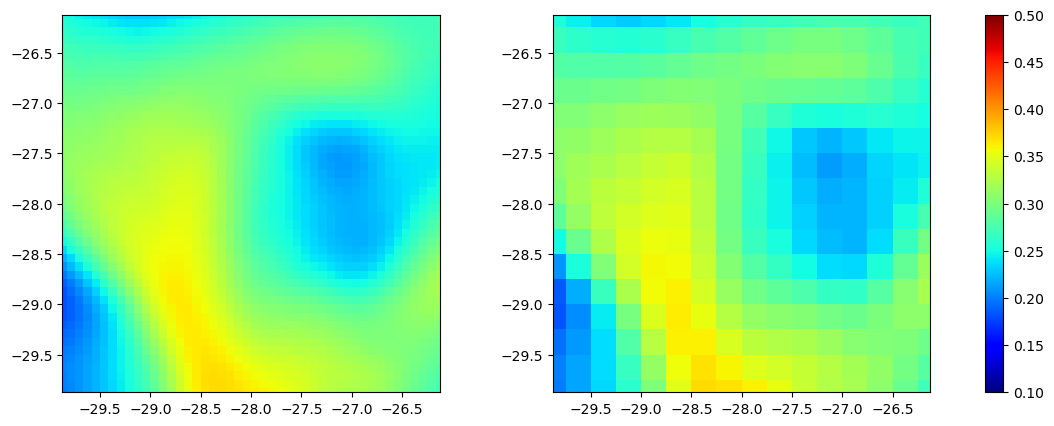

In [23]:
fig = plt.figure(figsize=(14, 7))
gs = GridSpec(1, 2, width_ratios=[1, 1], wspace=0.3)  # Define a 1x2 grid with space between subplots

ax1 = fig.add_subplot(gs[0])
c1 = ax1.pcolormesh(dat_glorys_i.longitude, dat_glorys_i.latitude, dat_glorys_i.zos.sel(time="2021-01-01T00:00:00.000000000"), 
                  vmin=0.1,vmax=.5, cmap='jet')
ax1.set_aspect('equal') 
plt.xlim(dat_aviso.longitude.min(),dat_aviso.longitude.max())
plt.ylim(dat_aviso.latitude.min(),dat_aviso.latitude.max())

ax2 = fig.add_subplot(gs[1]) 
c2 = ax2.pcolormesh(dat_dow.longitude, dat_dow.latitude, dat_dow.zos.sel(time="2021-01-01T00:00:00.000000000"), 
                  vmin=0.1,vmax=.5, cmap='jet')
ax2.set_aspect('equal')  
plt.xlim(dat_aviso.longitude.min(),dat_aviso.longitude.max())
plt.ylim(dat_aviso.latitude.min(),dat_aviso.latitude.max())

cbar = fig.colorbar(c1, ax=[ax1, ax2], location='right', shrink=0.7)



## SWOT

In [24]:
swot = xr.open_mfdataset('/home/jovyan/shared/cycle_500/*.nc',
                       combine='nested',   
                       concat_dim='num_lines',  
                       parallel=True,      
                       preprocess=lambda ds: ds.drop_vars(['i_num_line', 'i_num_pixel'], errors='ignore'))

swot = swot.sortby('time')

In [25]:
swot

<xarray.Dataset> Size: 764MB
Dimensions:         (num_lines: 276080, num_pixels: 69)
Coordinates:
    latitude        (num_lines, num_pixels) float64 152MB dask.array<chunksize=(9860, 69), meta=np.ndarray>
    longitude       (num_lines, num_pixels) float64 152MB dask.array<chunksize=(9860, 69), meta=np.ndarray>
Dimensions without coordinates: num_lines, num_pixels
Data variables:
    time            (num_lines) datetime64[ns] 2MB dask.array<chunksize=(9860,), meta=np.ndarray>
    mdt             (num_lines, num_pixels) float64 152MB dask.array<chunksize=(9860, 69), meta=np.ndarray>
    ssha            (num_lines, num_pixels) float64 152MB dask.array<chunksize=(9860, 69), meta=np.ndarray>
    ssha_noiseless  (num_lines, num_pixels) float64 152MB dask.array<chunksize=(9860, 69), meta=np.ndarray>
Attributes: (12/42)
    Conventions:                     CF-1.7
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by Altimetry
    geospatial_lat_units:            degrees_north
    geospatial_lon_units:            degrees_east
    ...                              ...
    geospatial_lat_min:              -78.272196
    geospatial_lat_max:              78.272247
    geospatial_lon_min:              8.4e-05
    geospatial_lon_max:              359.999504
    data_used:                       SWOT KaRIn L2_LR_SSH PGC0 (NASA/CNES). D...
    doi:                             https://doi.org/10.24400/527896/A01-2023...

(-40.0, -30.0)

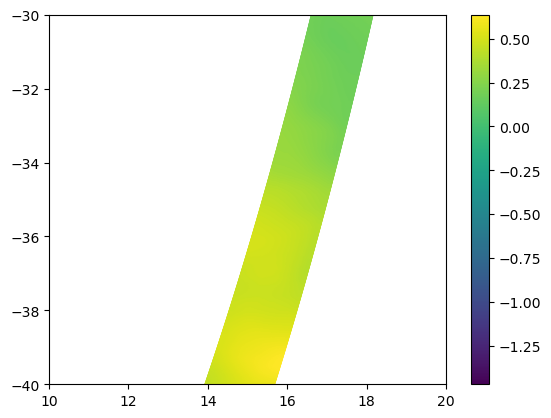

In [51]:
plt.scatter(x=swot.longitude[:12000], y=swot.latitude[:12000], c=swot.mdt[:12000], marker='.')
plt.colorbar()
plt.xlim(10,20)
plt.ylim(-40,-30)

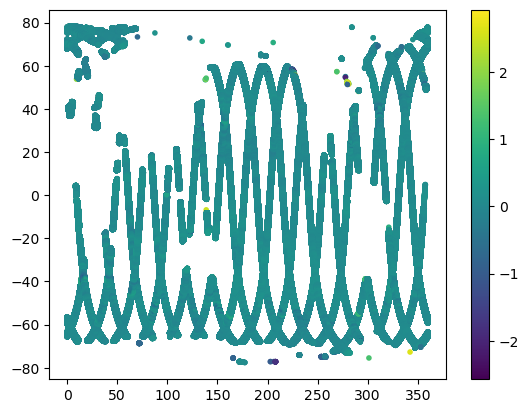

In [52]:
plt.scatter(x=swot.longitude, y=swot.latitude, c=swot.ssha, v marker='.')
plt.colorbar()
#plt.xlim(45,50)
#plt.ylim(-10,10)